# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [ ]:
dataframe = pd.read_excel("/content/stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [ ]:
# check the data shape
dataframe.shape

(86, 2)

In [ ]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [ ]:
dataframe.tail()

,date_,Total_watch_time_in_houres
81,2018-04-24,652.625278
82,2018-04-25,650.428889
83,2018-04-26,675.184444
84,2018-04-27,601.738056
85,2018-04-30,609.281667


In [ ]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [ ]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [ ]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [ ]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [ ]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

'\nTODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n'

In [ ]:
 df=dataframe.copy()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller


In [ ]:

test_result=adfuller(df['Total_watch_time_in_houres'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Total_watch_time_in_houres):
    result=adfuller(Total_watch_time_in_houres)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:

adfuller_test(df['Total_watch_time_in_houres'])


ADF Test Statistic : -1.7279558881675499
p-value : 0.41676935469919685
#Lags Used : 3
Number of Observations Used : 82
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['watch First Difference'] = df['Total_watch_time_in_houres'] - df['Total_watch_time_in_houres'].shift(1)

In [ ]:

df['Total_watch_time_in_houres'].shift(1)

date_
2018-01-01            NaN
2018-01-02    1123.551944
2018-01-03    1000.129722
2018-01-04     881.924444
2018-01-05     782.669444
                 ...     
2018-04-24     670.885556
2018-04-25     652.625278
2018-04-26     650.428889
2018-04-27     675.184444
2018-04-30     601.738056
Name: Total_watch_time_in_houres, Length: 86, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Total_watch_time_in_houres']-df['Total_watch_time_in_houres'].shift(1)

In [ ]:

df.head(14)


,Total_watch_time_in_houres,watch First Difference,Seasonal First Difference
date_,,,
2018-01-01,1123.551944,NaN,NaN
2018-01-02,1000.129722,-123.422222,-123.422222
2018-01-03,881.924444,-118.205278,-118.205278
2018-01-04,782.669444,-99.255000,-99.255000
2018-01-05,1051.939444,269.270000,269.270000
2018-01-08,841.178333,-210.761111,-210.761111
2018-01-09,873.495000,32.316667,32.316667
2018-01-10,970.475000,96.980000,96.980000
2018-01-11,721.381944,-249.093056,-249.093056


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -9.203001872276404
p-value : 1.978801975397271e-15
#Lags Used : 2
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


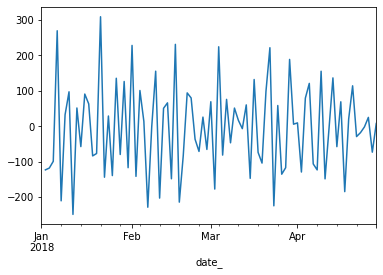

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


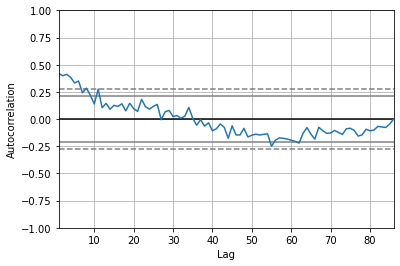

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Total_watch_time_in_houres'])
plt.show()

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [ ]:

model=ARIMA(df['Total_watch_time_in_houres'],order=(0,1,1))
model_fit=model.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.8/dist-packages/statsmode

In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                   
========================================================================================
Dep. Variable:     D.Total_watch_time_in_houres   No. Observations:                   85
Model:                           ARIMA(0, 1, 1)   Log Likelihood                -509.496
Method:                                 css-mle   S.D. of innovations             96.368
Date:                          Thu, 15 Dec 2022   AIC                           1024.993
Time:                                  05:42:16   BIC                           1032.321
Sample:                              01-02-2018   HQIC                          1027.940
                                   - 04-30-2018                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.6853      1.928     -1.912      0.056      -7.464       0.093
ma.L1.D.Total_watch_time_in_houres    -0.8330      0.116     -7.161      0.000      -1.061      -0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2005           +0.0000j            1.2005            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



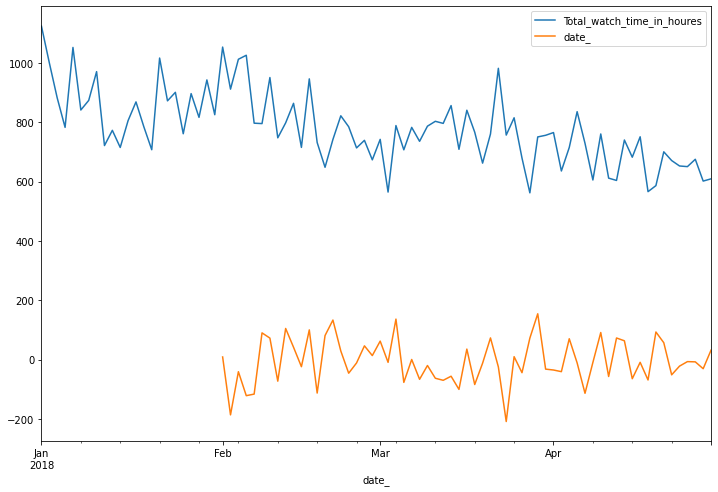

In [ ]:
df['date_']=model_fit.predict(start=pd.to_datetime('2018-02-01'), dynamic=False)
df[['Total_watch_time_in_houres','date_']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Total_watch_time_in_houres'],  
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results=model.fit(disp=0)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



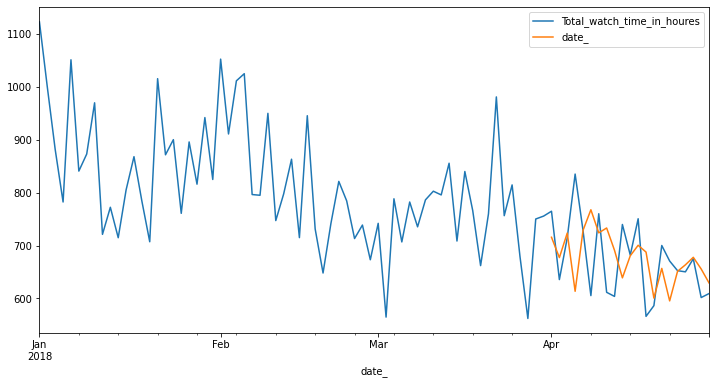

In [ ]:
df['date_']=results.predict(start=65,end=85,dynamic=False)
df[['Total_watch_time_in_houres','date_']].plot(figsize=(12,6))


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,4)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Total_watch_time_in_houres,watch First Difference,Seasonal First Difference,date_
2018-05-30,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN
2018-07-30,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

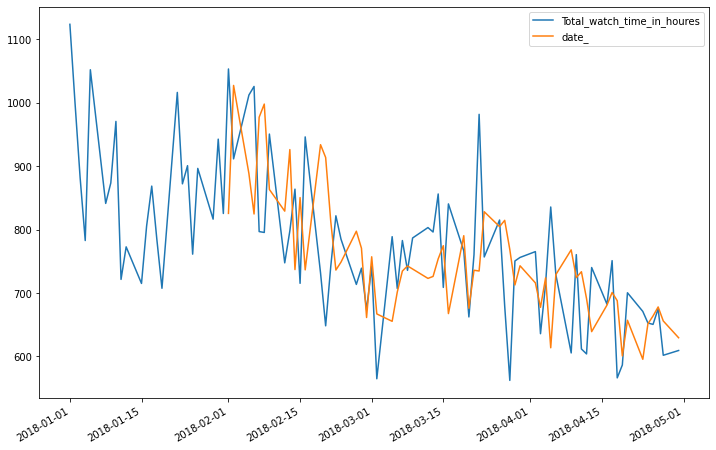

In [ ]:
future_df['date_'] = results.predict(start=pd.to_datetime('2018-02-01'), dynamic=False)  
future_df[['Total_watch_time_in_houres', 'date_']].plot(figsize=(12, 8)) 


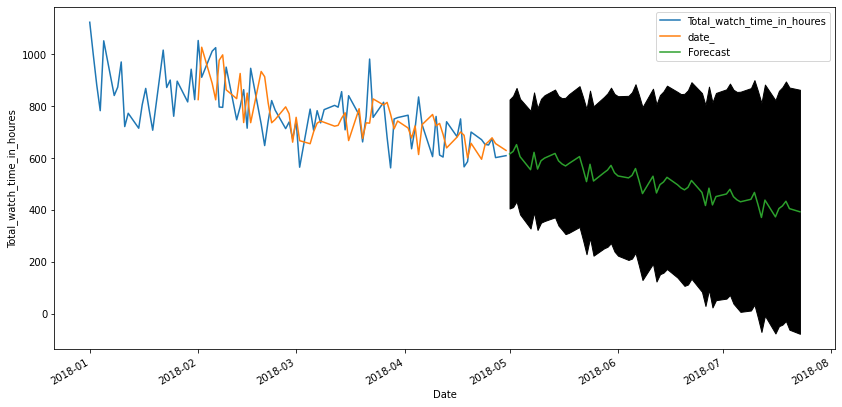

In [ ]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = future_df[['Total_watch_time_in_houres', 'date_']].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k')
ax.set_xlabel('Date')
ax.set_ylabel('Total_watch_time_in_houres')
plt.legend()
plt.show()